<a href="https://colab.research.google.com/github/guimaraess2/Sentiment-Analysis-NLP-/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importando as bibliotecas/Importing the libraries**






In [142]:
!pip install pandas plotnine

In [143]:
import re
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
nltk.download('stopwords')
nltk.download('rslp')
import nltk
from nltk import word_tokenize
from sklearn.pipeline import Pipeline
from plotnine import *
from plotnine.data import mpg
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


**Importar o dataset/Import the dataset**

In [144]:
df = pd.read_csv('/content/sample_data/Sentiment_analysis.csv')

**Visualizando algumas linhas/Viewing some lines**

In [145]:
df.tail()

,sentiment,text
94,positive,Biggest CO2 drop: Real-time data shows Covid-1...
95,positive,RT @KirkDBorne: [UPDATED] Free PDF #DataScienc...
96,positive,RT @gp_pulipaka: The Best Data Science Books o...
97,positive,RT @mrfrankish: Today's #learning journey @Mag...
98,positive,RT @gp_pulipaka: Free Online Books to Learn R ...


**Contar a quantidade de linhas de tweets positivos, negativos e neutros/Count the number of lines of positive, negative and neutral tweets**

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


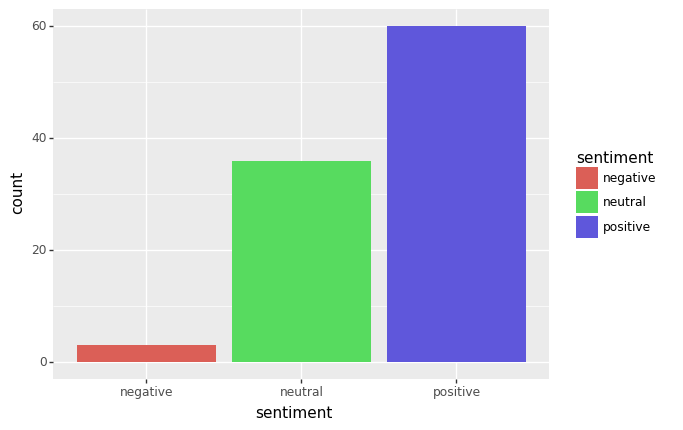

<ggplot: (8746098802643)>

In [146]:
(ggplot(df)+ aes(x='sentiment', fill='sentiment') + geom_bar(size=20))


**Visualizar as primeiras 20 linhas da coluna de texto/View the first 20 lines of the text column**

In [147]:
df.text.head(20)

0     RT @profnfenton: 6. None of this is exactly ro...
1     @davidhogg111 @lynecarr All data is past data,...
2     RT @sarang143u: Data Science Community discuss...
3     Data Science Community discussion to focus on ...
4     RT @SAURAVSINGLA_08: https://t.co/POwmZ6rl3c\n...
5     RT @SAURAVSINGLA_08: https://t.co/POwmZ6rl3c\n...
6     RT @darioandriani: What is Data Science(DS) an...
7     What is Data Science(DS) and How can it be lea...
8     RT: DataScienceCtrl Trends in AI and Data Scie...
9           Data Science is just: idea scan cites just.
10    RT @codek_tv: Top 10 Python IDEs For Data Scie...
11    RT @codek_tv: Top 10 Python IDEs For Data Scie...
12    RT @codek_tv: Top 10 Python IDEs For Data Scie...
13    Databases 101: How to Choose a Python Database...
14    RT @ianmSC: Argentina has had one of the world...
15    @Austen Applied for data science track in earl...
16    The 'President ' doesn't understand data or sc...
17    @erandaw1 @milkmyoats @carnivorz @Sustaina

**Separando os tweets e a classe/
Separating tweets and class**

In [148]:
tweets = df['text']
classes = df['sentiment']

**1) Criando função que remove palavras sem relevância (stop words)/Creating function that removes words without relevance (stop words)**

In [149]:
def RemoveStopWords(instancia): 
    stopwords = set(nltk.corpus.stopwords.words('english')) 
    palavras = [i for i  in instancia.split() if not i in stopwords] 
    return (" ".join(palavras)) 

*Testando a função RemoveStopWords/Testing the RemoveStopWords function*




In [150]:
RemoveStopWords('Data Science Community discussion to focus on machine learning in education ')

'Data Science Community discussion focus machine learning education'

**2) Criando função Stemming que reduz a palavra na forma radical/Creating Stemming function that reduces the word in radical form**

In [151]:
def Stemming(instancia):
    stm = nltk.stem.RSLPStemmer() 
    palavras=[]
    for i in instancia.split():
        palavras.append(stm.stem(i)) 
    return(" ".join(palavras))
    

*Testando a função Stemming/Testing the Stemming function*

In [152]:
Stemming('Real-time data shows Covid-19’s massive impact on global emissions')

'real-tim dat show covid-19’ massiv impact on glob emissiom'

**3) Aplicando uma função que realiza a limpeza nos dados/Applying a function that cleans the data**

In [153]:
def Limpeza_dados(instancia):
     instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
     return (instancia)

*Testando a função Limpeza_dados/Testing the Limpeza_dados function*

In [154]:
Limpeza_dados('https//=@Heidi_Cuda:-We can do so much more science so much quicker at mars with humans in the loop than with purely robotic missions')

' can do so much more science so much quicker at mars with humans in the loop than with purely robotic missions'

**Aplicando as 3 funções de Pre-processamento nos dados/Applying the 3 Pre-processing functions to the data**

In [155]:
def Preprocessing(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace('@','').replace('#','').replace('\\','')
    stopwords = set(nltk.corpus.stopwords.words('english'))
    palavras = [stemmer.stem(i) for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

tweets = [Preprocessing(i) for i in tweets]

**Visualizando como ficou o texto após Pré-processamento dos dados/Visualizing the text after the data pre-processing**

In [156]:
tweets[:20]

['rt profnfenton 6 non exactly rocket scienc download dat open excel divid n…',
 'davidhogg111 lynecarr dat past data, past dat show futur trend trend extrapolation larg part dat scienc',
 'rt sarang143u dat scienc community discussion focu machin learning education | penn stat universitynnpenn stat community m…',
 'dat scienc community discussion focu machin learning education | penn stat universitynnpenn stat com…',
 'rt sauravsingla_08 artificialintelligenc machinelearning 100daysofcodechalleng deeplearn…',
 'rt sauravsingla_08 artificialintelligenc machinelearning 100daysofcodechalleng deeplearn…',
 'rt darioandrian dat science(ds) learned?nn darioandrian 🔹ncc enricomolinar …',
 'dat science(ds) learned?nn darioandrian 🔹ncc…',
 'rt datasciencectrl trend ai dat scienc 2020� infographic',
 'dat scienc ide scan cit',
 'rt codek_tv top 10 python ide dat sciencen☞ python datascienc visualstudi numpy machinelearn…',
 'rt codek_tv top 10 python ide dat sciencen☞ python datascienc visualst

**Criando um modelo/Creating the model**

*Aplicando a vetorização para analisar palavra por palavra/
Applying vectorizer to analyze word by word*

In [157]:
vect = CountVectorizer(analyzer='word')

In [158]:
freq_tweets = vect.fit_transform(tweets)


**Aplicando ao modelo o classificador Naives Bayes/Applying the Naives Bayes classifier to the model**

In [159]:
modelo = MultinomialNB()

**Treinando o modelo/Training the model**

In [160]:
modelo.fit(freq_tweets, classes)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

**Testando o modelo com algumas instancias/Testing the model with a few instances**

In [161]:
testes = ['databrick icym catch ondemand vid join dennyl candid conversatiom discu collaboration',
          'What is Data Science(DS) and How can it be learned?',
          'VirusWhisperer: The problem with science is that data is highly inconvenient to politicians',
          'Data Mining with Python! Real-Life Data Science Exercises']

**Aplicando a função de Pre-processamento nos dados/Applying the Preprocessing function to the data**

In [162]:
testes=[Preprocessing(i) for i in testes]

In [163]:
freq_testes = vect.transform(testes)

In [164]:
for t, c in zip (testes,modelo.predict(freq_testes)):
    print (t +", "+ c)


databrick icym catch ondemand vid join dennyl candid conversatiom discu collaboration, positive
dat science(ds) learned?, neutral
viruswhisper probl scienc dat highly inconvenient politic, negative
dat mining python! reallif dat scienc exercis, positive


**Criando um Pipeline para reduzir código e automatizar processos/Creating a Pipeline to reduce code and automate processes**

In [165]:
pip_1 = Pipeline([
                  ('cont', CountVectorizer() ),   
                  ('classificador',  MultinomialNB() )       
])

In [166]:
pip_1.fit(tweets,classes)

Pipeline(memory=None,
         steps=[('cont',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classificador',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

**Validando o modelo com Validação Cruzada/Validating the model with cross-validation**

In [167]:
resultados = cross_val_predict(pip_1, tweets, classes, cv=10) 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)




**Medindo a acurácia média do modelo/
Measuring the average accuracy of the model**




In [168]:
acuracia = metrics.accuracy_score(classes, resultados)
print('A acurácia do modelo atingiu {:.2f}'.format(acuracia*100),'%')

A acurácia do modelo atingiu 72.73 %


**Medindo a validação do modelo/
Measuring model validation**

In [169]:
sentimento = ['positive', 'neutral', 'negative']
print(metrics.classification_report(classes, resultados, sentimento))

              precision    recall  f1-score   support

    positive       0.72      0.90      0.80        60
     neutral       0.75      0.50      0.60        36
    negative       0.00      0.00      0.00         3

    accuracy                           0.73        99
   macro avg       0.49      0.47      0.47        99
weighted avg       0.71      0.73      0.70        99



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Criando uma matriz de confusão/
Creating a confusion matrix**

In [170]:
print(pd.crosstab(classes, resultados, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   neutral  positive  All
Real                            
negative        0         3    3
neutral        18        18   36
positive        6        54   60
All            24        75   99


**Nota: Cabe ao cientista de dados usar outras abordagens para tentar melhorar a acurácia do modelo / Data scientist needs to test other approaches to try to improve model accuracy**